# [매매패턴 분석] 데이터 탐색 및 전처리   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# 한글깨짐 방지위해 폰트 변경 
plt.rcParams['font.family']="gulim"

## 1. 파일 읽기
    -  계좌번호는 String 형태로 읽어옴. 

In [2]:
data = pd.read_csv('MISdata_2.sql',encoding='euc-kr', converters={'계좌번호':str})
print( '데이터 전체 길이 : ', len(data))
print( '데이터 변수 확인')
print(data.columns.values)

데이터 전체 길이 :  181149
데이터 변수 확인
['계좌번호' 'Sum - 매수체결금액' 'CountDistinct - 종목명' 'Sum - 증권거래소매수체결비율'
 'Sum - 코스닥매수체결비율' 'Sum - 거래대금500억이상매수체결비율' 'Sum - 양봉매수체결비율'
 'Sum - 매수체결시점(10시이전)비율' 'Sum - 매수체결시점(14:30~)비율'
 'Sum - 매수체결시점(10:00~14:30)비율' 'Sum - IT가전체결비율' 'Sum - IT하드웨어체결비율'
 'Sum - 건강관리체결비율' 'Sum - 건설,건축관련체결비율' 'Sum - 기계체결비율' 'Sum - 디스플레이체결비율'
 'Sum - 미디어,교육체결비율' 'Sum - 반도체체결비율' 'Sum - 보험체결비율' 'Sum - 비철,목재등체결비율'
 'Sum - 상사,자본재체결비율' 'Sum - 소매(유통)체결비율' 'Sum - 소프트웨어체결비율' 'Sum - 에너지체결비율'
 'Sum - 운송체결비율' 'Sum - 유틸리티체결비율' 'Sum - 은행체결비율' 'Sum - 자동차체결비율'
 'Sum - 조선체결비율' 'Sum - 증권체결비율' 'Sum - 철강체결비율' 'Sum - 통신서비스체결비율'
 'Sum - 필수소비재체결비율' 'Sum - 호텔,레저서비스체결비율' 'Sum - 화장품,의류,완구체결비율'
 'Sum - 화학체결비율' 'Sum - 매수체결여부' 'Sum - 증권거래소매수여부' 'Sum - 코스닥매수여부'
 'Sum - 거래대금500억이상매수여부' 'Sum - 양봉매수여부' 'Sum - 매수체결시점(10시이전)'
 'Sum - 매수체결시점(14:30~)' 'Sum - 매수체결시점(10:00~14:30)' 'Sum - IT가전여부'
 'Sum - IT하드웨어여부' 'Sum - 건강관리여부' 'Sum - 건설,건축관련여부' 'Sum - 기계여부'
 'Sum - 디스플레이여부' 'Sum - 미디어,교육여부' 'Sum - 반도체여부' 'Sum - 보험여부'
 'Sum

### 1.1 필요없는 변수 제거 

In [3]:
data = pd.concat([data.iloc[:, range(0,37)] , data.iloc[:,-1]], axis=1)
print(data.columns.values)
data.tail(2)

['계좌번호' 'Sum - 매수체결금액' 'CountDistinct - 종목명' 'Sum - 증권거래소매수체결비율'
 'Sum - 코스닥매수체결비율' 'Sum - 거래대금500억이상매수체결비율' 'Sum - 양봉매수체결비율'
 'Sum - 매수체결시점(10시이전)비율' 'Sum - 매수체결시점(14:30~)비율'
 'Sum - 매수체결시점(10:00~14:30)비율' 'Sum - IT가전체결비율' 'Sum - IT하드웨어체결비율'
 'Sum - 건강관리체결비율' 'Sum - 건설,건축관련체결비율' 'Sum - 기계체결비율' 'Sum - 디스플레이체결비율'
 'Sum - 미디어,교육체결비율' 'Sum - 반도체체결비율' 'Sum - 보험체결비율' 'Sum - 비철,목재등체결비율'
 'Sum - 상사,자본재체결비율' 'Sum - 소매(유통)체결비율' 'Sum - 소프트웨어체결비율' 'Sum - 에너지체결비율'
 'Sum - 운송체결비율' 'Sum - 유틸리티체결비율' 'Sum - 은행체결비율' 'Sum - 자동차체결비율'
 'Sum - 조선체결비율' 'Sum - 증권체결비율' 'Sum - 철강체결비율' 'Sum - 통신서비스체결비율'
 'Sum - 필수소비재체결비율' 'Sum - 호텔,레저서비스체결비율' 'Sum - 화장품,의류,완구체결비율'
 'Sum - 화학체결비율' 'Sum - 매수체결여부' '최종수익률(실현+평가)']


,계좌번호,Sum - 매수체결금액,CountDistinct - 종목명,Sum - 증권거래소매수체결비율,Sum - 코스닥매수체결비율,Sum - 거래대금500억이상매수체결비율,Sum - 양봉매수체결비율,Sum - 매수체결시점(10시이전)비율,Sum - 매수체결시점(14:30~)비율,Sum - 매수체결시점(10:00~14:30)비율,...,Sum - 조선체결비율,Sum - 증권체결비율,Sum - 철강체결비율,Sum - 통신서비스체결비율,Sum - 필수소비재체결비율,"Sum - 호텔,레저서비스체결비율","Sum - 화장품,의류,완구체결비율",Sum - 화학체결비율,Sum - 매수체결여부,최종수익률(실현+평가)
181147,68991416,104354720,10,0.819096,0.180904,0.944579,0.779490,0.384778,0.336228,0.278993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005054,0.0,52,3.977491
181148,71564693,6984000,1,1.000000,0.000000,1.000000,0.111111,0.623568,0.190435,0.185997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,23,2.061856


### 1.2 변수 명 변경

In [4]:
# 변수명에 'Sum - ' 지우기 
data.columns = data.columns.str.replace('Sum - ', '')
# 특정 변수 명 대체
data.rename(columns={'매수체결여부':'매수체결건수','CountDistinct - 종목명':'매수종목개수'}, inplace=True)
# 데이터 셋 변수명 확인
data.columns.values

array(['계좌번호', '매수체결금액', '매수종목개수', '증권거래소매수체결비율', '코스닥매수체결비율',
       '거래대금500억이상매수체결비율', '양봉매수체결비율', '매수체결시점(10시이전)비율',
       '매수체결시점(14:30~)비율', '매수체결시점(10:00~14:30)비율', 'IT가전체결비율',
       'IT하드웨어체결비율', '건강관리체결비율', '건설,건축관련체결비율', '기계체결비율', '디스플레이체결비율',
       '미디어,교육체결비율', '반도체체결비율', '보험체결비율', '비철,목재등체결비율', '상사,자본재체결비율',
       '소매(유통)체결비율', '소프트웨어체결비율', '에너지체결비율', '운송체결비율', '유틸리티체결비율',
       '은행체결비율', '자동차체결비율', '조선체결비율', '증권체결비율', '철강체결비율', '통신서비스체결비율',
       '필수소비재체결비율', '호텔,레저서비스체결비율', '화장품,의류,완구체결비율', '화학체결비율', '매수체결건수',
       '최종수익률(실현+평가)'], dtype=object)

### 1.3 군집에 사용되지 않는 업종관련 데이터 지우기

In [5]:
data = pd.concat([data.iloc[:, range(0,10)] , data.iloc[:,-2:]], axis=1)
print(data.columns.values)
data.tail(2)

['계좌번호' '매수체결금액' '매수종목개수' '증권거래소매수체결비율' '코스닥매수체결비율' '거래대금500억이상매수체결비율'
 '양봉매수체결비율' '매수체결시점(10시이전)비율' '매수체결시점(14:30~)비율' '매수체결시점(10:00~14:30)비율'
 '매수체결건수' '최종수익률(실현+평가)']


,계좌번호,매수체결금액,매수종목개수,증권거래소매수체결비율,코스닥매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결시점(10시이전)비율,매수체결시점(14:30~)비율,매수체결시점(10:00~14:30)비율,매수체결건수,최종수익률(실현+평가)
181147,68991416,104354720,10,0.819096,0.180904,0.944579,0.779490,0.384778,0.336228,0.278993,52,3.977491
181148,71564693,6984000,1,1.000000,0.000000,1.000000,0.111111,0.623568,0.190435,0.185997,23,2.061856


## 2. 결측값 확인
    - 결측 데이터 제거 또는 대체 

In [6]:
data.isnull().sum()

계좌번호                       0
매수체결금액                     0
매수종목개수                     0
증권거래소매수체결비율                0
코스닥매수체결비율                  0
거래대금500억이상매수체결비율           0
양봉매수체결비율                  68
매수체결시점(10시이전)비율            0
매수체결시점(14:30~)비율           0
매수체결시점(10:00~14:30)비율      0
매수체결건수                     0
최종수익률(실현+평가)             318
dtype: int64

In [7]:
# 최종수익률이 NULL 인 데이터 제거 
data = data[~data['최종수익률(실현+평가)'].isnull()]

# NULL 이 한개라도 있는 변수명 확인 
a = data.isnull().sum()
a[a>0]

Series([], dtype: int64)

### 2.1 데이터 대상 줄이기.
    - 매수금액 10만원 이상 30건 초과 계좌만 군집분석 대상으로 추출
    - (자원부족으로 데이터 줄이는 임식 로직)

In [8]:
data['평균매수금액'] = data['매수체결금액']/data['매수체결건수']
data = data[(data['평균매수금액'] > 100000) & (data['매수체결건수'] > 30)]
data = data.loc[:,~data.columns.isin(['평균매수금액'])]
data

,계좌번호,매수체결금액,매수종목개수,증권거래소매수체결비율,코스닥매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결시점(10시이전)비율,매수체결시점(14:30~)비율,매수체결시점(10:00~14:30)비율,매수체결건수,최종수익률(실현+평가)
0,67824213,1508246320,164,0.257300,0.742700,0.535845,0.551714,0.442812,0.159454,0.397735,300,-0.335624
1,80677477,2792889800,37,0.198379,0.801621,0.770780,0.501761,0.379941,0.104625,0.515435,428,1.277612
2,80704859,239305227,29,0.356368,0.643632,0.361819,0.613781,0.405177,0.077357,0.517466,1764,-1.070767
3,80529659,342553354,39,0.264064,0.735936,0.411231,0.961323,0.170930,0.277890,0.551179,3099,0.348191
4,80720483,1797513740,87,0.254002,0.745998,0.252472,0.879093,0.411796,0.099918,0.488286,356,1.805954
...,...,...,...,...,...,...,...,...,...,...,...,...
181141,72896398,25594890,33,0.553148,0.446852,0.637391,0.758940,0.244607,0.340521,0.414871,40,-0.801371
181142,68959339,46002700,24,0.752658,0.247342,0.510121,0.693858,0.124401,0.102039,0.773560,36,-6.989785
181143,68925894,58562855,20,0.706920,0.293080,0.829571,0.809733,0.635556,0.000000,0.364444,35,-2.685491
181145,72913852,1018244735,31,0.635890,0.364110,0.477285,0.794835,0.497915,0.127372,0.374713,774,-0.161626


### 2.2 NULL 데이터 row 삭제 후 INDEX 다시 세팅 (중요!!)

In [9]:
# NA 데이터 지우고 나서 인덱스 다시 세팅
# 매수체결금액 높은 순으로 정렬 후 INDEX 재지정 
data.sort_values(by=['매수체결금액'], axis=0, inplace=True, ascending=False)
data = data.reset_index(drop = True)

## 3. 변수간 상관관계 분석 
    - 다중공선성 확인

In [10]:
corr = data.iloc[:,1:].corr(method='pearson')

In [11]:
corr

,매수체결금액,매수종목개수,증권거래소매수체결비율,코스닥매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결시점(10시이전)비율,매수체결시점(14:30~)비율,매수체결시점(10:00~14:30)비율,매수체결건수,최종수익률(실현+평가)
매수체결금액,1.000000,0.162235,-0.026333,0.026333,0.038041,0.049379,-0.013950,0.012382,0.006123,0.223183,-0.012424
매수종목개수,0.162235,1.000000,-0.221884,0.221884,0.018230,0.303553,-0.064621,0.041512,0.039643,0.391952,-0.063008
증권거래소매수체결비율,-0.026333,-0.221884,1.000000,-1.000000,0.275535,-0.296783,0.058588,-0.041662,-0.033075,-0.075509,0.035260
코스닥매수체결비율,0.026333,0.221884,-1.000000,1.000000,-0.275535,0.296783,-0.058588,0.041662,0.033075,0.075509,-0.035260
거래대금500억이상매수체결비율,0.038041,0.018230,0.275535,-0.275535,1.000000,0.287597,0.020088,-0.038646,0.006008,-0.021089,-0.030007
양봉매수체결비율,0.049379,0.303553,-0.296783,0.296783,0.287597,1.000000,-0.007892,-0.032151,0.031348,0.041624,-0.105689
매수체결시점(10시이전)비율,-0.013950,-0.064621,0.058588,-0.058588,0.020088,-0.007892,1.000000,-0.428820,-0.765572,-0.025418,-0.004954
매수체결시점(14:30~)비율,0.012382,0.041512,-0.041662,0.041662,-0.038646,-0.032151,-0.428820,1.000000,-0.252904,0.015465,0.021438
매수체결시점(10:00~14:30)비율,0.006123,0.039643,-0.033075,0.033075,0.006008,0.031348,-0.765572,-0.252904,1.000000,0.016208,-0.009961
매수체결건수,0.223183,0.391952,-0.075509,0.075509,-0.021089,0.041624,-0.025418,0.015465,0.016208,1.000000,-0.018938


In [12]:
# 상관성 높은 변수 제거
# 1. 증권거래소매수체결비율 / 코스닥매수체결비율 상관성 높음 -> 코스닥매수체결비율 제거
data = data.loc[:,~data.columns.isin(['코스닥매수체결비율'])]

In [13]:
# 2. 매수거래시간 별 변수 상관관계 높음. 
# 장초.마감 시간 거래 비율 변수로 통합 
data['매수체결시간_시작마감'] = data['매수체결시점(10시이전)비율'] + data['매수체결시점(10:00~14:30)비율']
data = data.drop(data.filter(regex='매수체결시점'), axis=1)

## 4. 데이터 분포 확인
    - 평균 분산 및 4분위수 확인
    - BoxPlot , DistributePlot 시각화

In [14]:
data.iloc[:,1:].describe()

,매수체결금액,매수종목개수,증권거래소매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결건수,최종수익률(실현+평가),매수체결시간_시작마감
count,1.670000e+05,167000.000000,167000.000000,167000.000000,167000.000000,167000.000000,167000.000000,167000.000000
mean,5.774842e+08,46.443455,0.505020,0.490180,0.591182,263.510180,0.921661,0.867231
std,3.962982e+09,58.385562,0.263575,0.255444,0.242675,971.966128,6.065616,0.099631
min,3.679950e+06,1.000000,0.000000,0.000000,0.000000,31.000000,-100.000000,0.000000
25%,4.496234e+07,16.000000,0.300132,0.291702,0.416962,56.000000,-1.042156,0.827128
50%,1.274023e+08,29.000000,0.466048,0.499276,0.620976,100.000000,0.186574,0.885713
75%,3.986842e+08,53.000000,0.708176,0.690533,0.787647,219.000000,2.136551,0.932458
max,6.668346e+11,1309.000000,1.000000,1.000000,1.000000,138415.000000,421.647519,1.000000


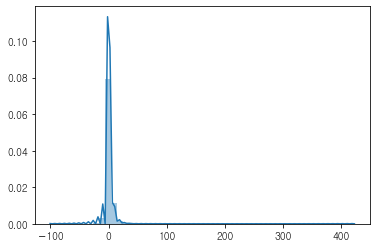

In [15]:
sns.distplot(data[['최종수익률(실현+평가)']])

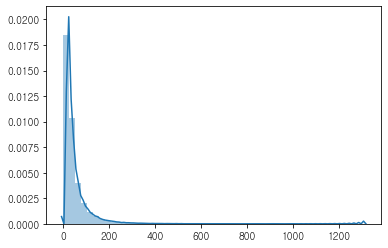

In [16]:
sns.distplot(data[['매수종목개수']])

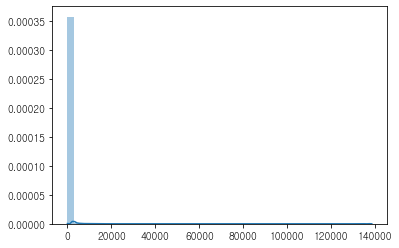

In [17]:
sns.distplot(data[['매수체결건수']])

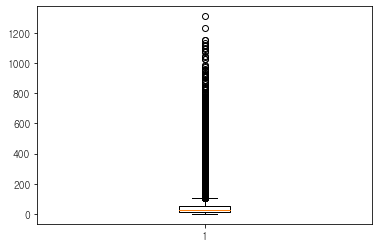

< 거래상품개수(매수종목개수) DESCRIBE >
count    167000.000000
mean         46.443455
std          58.385562
min           1.000000
25%          16.000000
50%          29.000000
75%          53.000000
max        1309.000000
Name: 매수종목개수, dtype: float64
< 이상치 >
upper_bound : 108.5
lower_bound : 0
이상치 비중 : 8.71317365269461 %


In [18]:
# 거래상품개수(dCNT_PDNO) BOXPLOT 시각화
plt.boxplot(data['매수종목개수'])
plt.show()

temp_dsc = data['매수종목개수'].describe()
print('< 거래상품개수(매수종목개수) DESCRIBE >')
print(temp_dsc) 
h_bound = temp_dsc[6]+ (temp_dsc[6] - temp_dsc[4])*1.5
l_bound = max(temp_dsc[4]- (temp_dsc[6] - temp_dsc[4])*1.5,0)
print('< 이상치 >')
print('upper_bound :',h_bound)
print('lower_bound :',l_bound)

print('이상치 비중 :',len(data.loc[data['매수종목개수']>h_bound,:]) / len(data) * 100, '%')

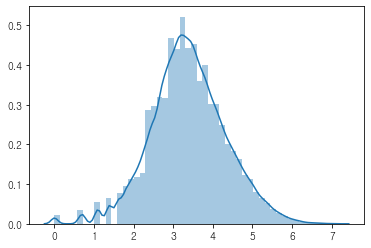

In [19]:
# 로그변환 후 데이터 분포 재확인 
sns.distplot(np.log(data[['매수종목개수']]))

((array([-4.45726627, -4.26322597, -4.15785004, ...,  4.15785004,
          4.26322597,  4.45726627]),
  array([0.        , 0.        , 0.        , ..., 7.05185562, 7.11476945,
         7.17701877])),
 (0.9437742170160534, 3.381442542497565, 0.9977763644651662))

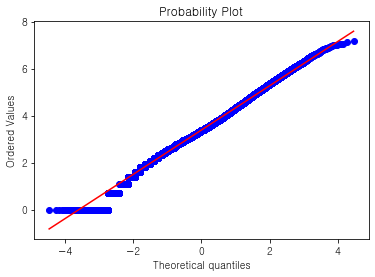

In [20]:
# 로그변환 후 데이터 정상성 확인 
stats.probplot(np.log(data['매수종목개수']), plot=plt)

In [21]:
# shapiro 점수로 데이터 정규성 확인 
stats.shapiro(np.log(data['매수종목개수'])) # 정규성 만족

C:\Users\Administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9960020780563354, 0.0)

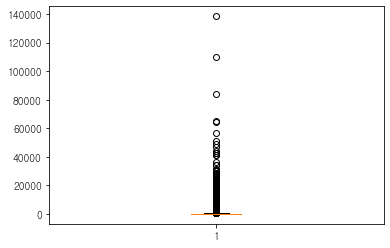

< 거래상품개수(매수체결건수) DESCRIBE >
count    167000.000000
mean        263.510180
std         971.966128
min          31.000000
25%          56.000000
50%         100.000000
75%         219.000000
max      138415.000000
Name: 매수체결건수, dtype: float64
< 이상치 >
upper_bound : 463.5
lower_bound : 0
이상치 비중 : 11.338922155688623 %


In [22]:
# 거래상품개수(dCNT_PDNO) BOXPLOT 시각화
plt.boxplot(data['매수체결건수'])
plt.show()

temp_dsc = data['매수체결건수'].describe()
print('< 거래상품개수(매수체결건수) DESCRIBE >')
print(temp_dsc) 
h_bound = temp_dsc[6]+ (temp_dsc[6] - temp_dsc[4])*1.5
l_bound = max(temp_dsc[4]- (temp_dsc[6] - temp_dsc[4])*1.5,0)
print('< 이상치 >')
print('upper_bound :',h_bound)
print('lower_bound :',l_bound)

print('이상치 비중 :',len(data.loc[data['매수체결건수']>h_bound,:]) / len(data) * 100, '%')

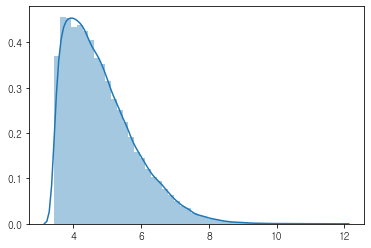

In [23]:
sns.distplot(np.log(data[['매수체결건수']]))

### 4.1 데이터 Scaling 적용 
    - Quantile Scaling

In [24]:
# Quantile Scaling
scaler_Q =preprocessing.QuantileTransformer(output_distribution='normal', n_quantiles=1000)

scaled_Q = scaler_Q.fit_transform(data[['매수체결금액','매수종목개수','매수체결건수']])
scaled_Q = pd.DataFrame(scaled_Q, columns=['매수체결금액','매수종목개수','매수체결건수'])
scaled_Q.head(3)

,매수체결금액,매수종목개수,매수체결건수
0,5.199338,2.371329,2.788311
1,3.933572,2.986017,2.956888
2,3.566170,2.921143,2.929000


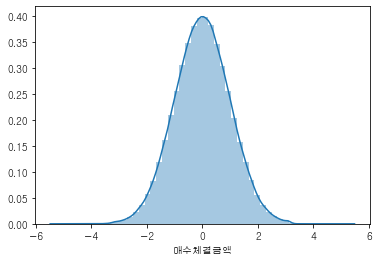

In [25]:
sns.distplot(scaled_Q.iloc[:,0])

### 4.2 데이터 Scaling 적용 
    - MinMax Scaling

In [26]:
# 0~1 이로 변환해주는 minmax Scaling 적용
scalerMinMax =preprocessing.MinMaxScaler()
scaled_MM = scalerMinMax.fit_transform(scaled_Q)
scaled_MM = pd.DataFrame(scaled_MM, columns=['매수체결금액_Scale','매수종목개수_Scale','매수체결건수_Scale'])
scaled_MM.head(3)

,매수체결금액_Scale,매수종목개수_Scale,매수체결건수_Scale
0,1.000000,0.728041,0.768141
1,0.878276,0.787154,0.784352
2,0.842945,0.780915,0.781671


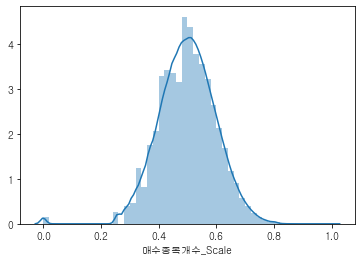

In [27]:
sns.distplot(scaled_MM.iloc[:,1])

In [28]:
data = pd.concat([data, scaled_MM], axis=1)
data.tail(1)

,계좌번호,매수체결금액,매수종목개수,증권거래소매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결건수,최종수익률(실현+평가),매수체결시간_시작마감,매수체결금액_Scale,매수종목개수_Scale,매수체결건수_Scale
166999,72652525,3679950,8,0.476909,0.465292,0.112977,35,-5.077515,0.895596,0.0,0.361617,0.338012


## 5. 전처리 완료 데이터 저장 

In [29]:
data.to_csv('MIS_preDone.sql', encoding='euc-kr', index = False)